# ADS Assignment-3

### 1.Download dataset Housing.csv

#####https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view?usp=sharing

### 2.Load the dataset

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv("Housing.csv")

In [99]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


### 3.Perform Below Visualizations: Univariate Analysis,Bivariate Analysis and Multivariate Analysis

#### Univariate Analysis

([<matplotlib.patches.Wedge at 0x7fc7bbbb6250>,
 [Text(-0.7423047515531817, 0.8117780828659822, '2'),
  Text(0.689374049124918, -0.8571834228408267, '4'),
  Text(1.0973693819379247, -0.07602920218690572, '1'),
  Text(1.0999817250072712, -0.0063407136844588685, '3')])

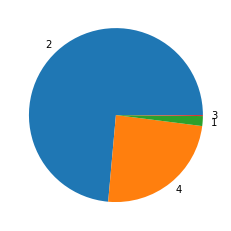

In [100]:
categories = list(df['bathrooms'].unique())
value_counts = df['bathrooms'].value_counts()
plt.pie(value_counts,labels=categories)

(array([ 73., 198., 117.,  88.,  39.,  15.,   8.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <BarContainer object of 10 artists>)

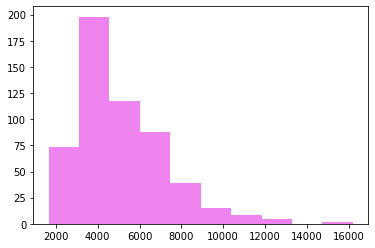

In [101]:
plt.hist(df['area'],color='violet')

#### Bivariate Analysis

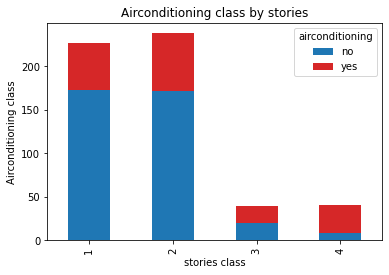

In [102]:
parking_counts = df.groupby('stories')['airconditioning'].value_counts().unstack()
colors = ['tab:blue', 'tab:red']
parking_counts.plot(kind='bar', stacked=True,color=colors)
plt.xlabel('stories class')
plt.ylabel('Airconditioning class')
plt.title('Airconditioning class by stories')
plt.show()

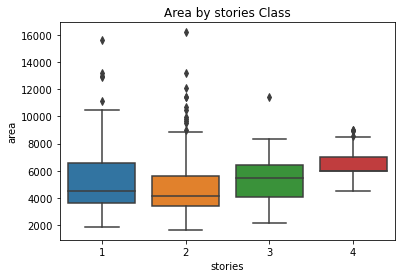

In [103]:
import seaborn as sns
sns.boxplot(x='stories', y='area', data=df)
plt.title('Area by stories Class')
plt.show()


#### Multivariate Analysis

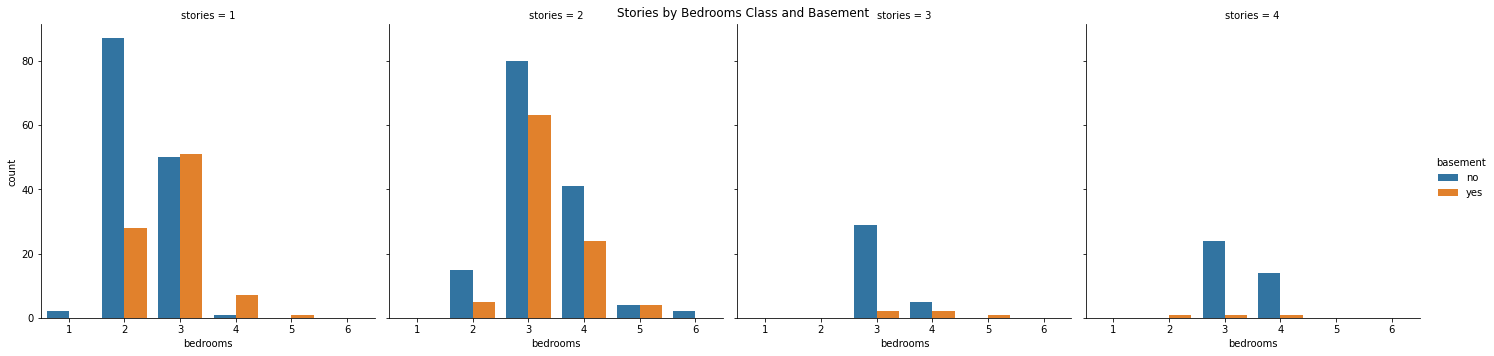

In [104]:
sns.catplot(x='bedrooms', hue='basement', col='stories', data=df, kind='count')
plt.suptitle('Stories by Bedrooms Class and Basement')
plt.show()

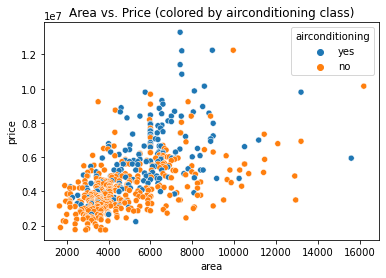

In [105]:
sns.scatterplot(x='area', y='price', hue='airconditioning', data=df)
plt.title('Area vs. Price (colored by airconditioning class)')
plt.show()

### 4. Perform descriptive statistics on the dataset.

In [33]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 5. Check for the Missing values.

In [36]:
df.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False


### 6. Find the outliers and replace the outliers

In [37]:
z_threshold = 3
z_scores = (df['price'] - df['price'].mean()) / df['price'].std()
outliers = (np.abs(z_scores) > z_threshold)
df.loc[outliers,'price'] = df['price'].mean()

In [38]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4.766729e+06,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,4.766729e+06,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,4.766729e+06,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,4.766729e+06,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,4.766729e+06,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1.767150e+06,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1.750000e+06,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1.750000e+06,2910,3,1,1,no,no,no,no,no,0,furnished


### 7. Check for Categorical columns and perform encoding.

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['basement']= label_encoder.fit_transform(df['basement'])
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])

In [42]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4.766729e+06,7420,4,2,3,1,0,0,0,1,2,0
1,4.766729e+06,8960,4,4,4,1,0,0,0,1,3,0
2,4.766729e+06,9960,3,2,2,1,0,1,0,0,2,1
3,4.766729e+06,7500,4,2,2,1,0,1,0,1,3,0
4,4.766729e+06,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000,2,1,1,1,0,1,0,0,2,2
541,1.767150e+06,2400,3,1,1,0,0,0,0,0,0,1
542,1.750000e+06,3620,2,1,1,1,0,0,0,0,0,2
543,1.750000e+06,2910,3,1,1,0,0,0,0,0,0,0


### 8. Split the data into dependent and independent variables.

In [43]:
x = df.drop(columns="price")
y=df['price']
x
y

0      4.766729e+06
1      4.766729e+06
2      4.766729e+06
3      4.766729e+06
4      4.766729e+06
           ...     
540    1.820000e+06
541    1.767150e+06
542    1.750000e+06
543    1.750000e+06
544    1.750000e+06
Name: price, Length: 545, dtype: float64

### 9. Scale the independent variables

In [44]:
min_value = df['area'].min()
max_value = df['area'].max()
df['scaled_area']  = (df['area'] - min_value) / (max_value - min_value)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,scaled_area
0,4.766729e+06,7420,4,2,3,1,0,0,0,1,2,0,0.396564
1,4.766729e+06,8960,4,4,4,1,0,0,0,1,3,0,0.502405
2,4.766729e+06,9960,3,2,2,1,0,1,0,0,2,1,0.571134
3,4.766729e+06,7500,4,2,2,1,0,1,0,1,3,0,0.402062
4,4.766729e+06,7420,4,1,2,1,1,1,0,1,2,0,0.396564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000,2,1,1,1,0,1,0,0,2,2,0.092784
541,1.767150e+06,2400,3,1,1,0,0,0,0,0,0,1,0.051546
542,1.750000e+06,3620,2,1,1,1,0,0,0,0,0,2,0.135395
543,1.750000e+06,2910,3,1,1,0,0,0,0,0,0,0,0.086598


### 10. Split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
X_train
y_train

46     7525000.0
93     6300000.0
335    3920000.0
412    3430000.0
471    3010000.0
         ...    
71     6755000.0
106    6160000.0
270    4340000.0
435    3290000.0
102    6195000.0
Name: price, Length: 436, dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()


LinearRegression()

### 12. Train the model

In [ ]:
regressor.fit(X_train,y_train)

In [85]:
print(regressor.intercept_)

525347.9524032846


In [86]:
print(regressor.coef_)

[ 2.46641528e+02  1.08884368e+05  7.61280891e+05  4.22769998e+05
  5.27258474e+05  3.58434889e+05  4.18622427e+05  7.36165915e+05
  6.90364618e+05  1.15860841e+05 -1.77279619e+05]


### 13. Test the model

In [89]:
y_pred=regressor.predict(X_test)
y_pred

array([4964096.24921776, 6463665.859508  , 3273578.20701283,
       4732373.05906739, 3540010.87230732, 3866182.25159695,
       5586782.5401725 , 5864044.21994416, 2846022.62055083,
       2701984.07241241, 8324057.55736864, 3070154.58581138,
       3180479.44263714, 3464753.49010105, 4029310.47479697,
       4880568.12381214, 3193199.48799057, 4917595.80860582,
       4608857.38833295, 3756995.6022071 , 5405566.2672638 ,
       5536781.16585238, 2999861.75028569, 4461677.14470531,
       5187028.35789848, 6676975.41944176, 3639046.45236125,
       5264343.21057423, 7582457.31760385, 3617120.63536736,
       5665634.848682  , 3516903.58923909, 6698779.9845289 ,
       4440334.50878139, 3918118.84608077, 5510858.17895661,
       4963476.33733996, 4633712.6541461 , 3230169.84420952,
       4543635.61708974, 4585951.87748451, 3685540.17951559,
       6443934.53725518, 4137835.67808517, 3941976.74832736,
       4357577.6661117 , 6585835.47463621, 4177962.69959012,
       4085331.11571934,

In [90]:
y_test

316    4060000.0
77     6650000.0
360    3710000.0
90     6440000.0
493    2800000.0
         ...    
15     9100000.0
357    3773000.0
39     7910000.0
54     7350000.0
155    5530000.0
Name: price, Length: 109, dtype: float64

In [95]:
# Print the predicted prices
print('Predicted prices:')
for i in range(len(y_pred)):
    print(y_pred[i])

Predicted prices:
4964096.249217764
6463665.859508005
3273578.2070128345
4732373.059067393
3540010.8723073155
3866182.2515969453
5586782.540172498
5864044.219944159
2846022.6205508336
2701984.0724124108
8324057.55736864
3070154.585811384
3180479.4426371437
3464753.490101053
4029310.474796971
4880568.123812143
3193199.4879905693
4917595.80860582
4608857.388332952
3756995.602207102
5405566.267263804
5536781.165852377
2999861.750285687
4461677.144705314
5187028.357898476
6676975.419441763
3639046.4523612494
5264343.210574228
7582457.317603851
3617120.6353673646
5665634.848682002
3516903.5892390907
6698779.9845288955
4440334.508781394
3918118.846080766
5510858.178956615
4963476.337339958
4633712.654146104
3230169.8442095155
4543635.617089736
4585951.877484511
3685540.1795155895
6443934.537255178
4137835.678085167
3941976.7483273568
4357577.666111697
6585835.47463621
4177962.699590116
4085331.1157193445
3490135.50691484
7004073.790645339
2955652.2391041676
4486691.5668619
4500416.247790478


###14. Measure the performance using Metrics

In [ ]:
print('R-squared:', regressor.score(X_test, y_test))
